# Анализ бизнес-показателей

Необходимо выяснить причины убытков развлекательного приложения, не смотря на затраты по привлечению пользователей.

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

##  Обзор и предобработка данных

Импортируем необходимые библиотеки .  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Ознакомимся с файлами с данными. Так как данные представлены тремя датасетами напишем функцию для знакомства с данными.

In [2]:
def meet_data(way1, way2):
    try:
        df = pd.read_csv(way1)    #загрузка файла по локальному пути
    except:
        df = pd.read_csv(way2) #загрузка файла по серверному пути
    display(df.head(10)) # получение первых 10 строк таблицы
    print('Общая информация о таблице')
    df.info() # получение общей информации о таблице
    print()
    print('Посчитаем пропущенные значения')
    display(df.isna().sum()) # подсчет пропущенных значений
    print()
    print('Посчитаем дубликаты')
    display(df.duplicated().sum()) # подсчет дубликатов
    return df

Рассмотрим данные о посещениях приложения 

In [3]:
visits = meet_data('visits_info_short.csv', '/datasets/visits_info_short.csv')


User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Посчитаем пропущенные значения


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


Посчитаем дубликаты


0

Описание даннных таблицы visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

В данном датасете пропущенные значения отсутствуют, типы данных в столбцах Session start и Session End не соответствуют содержащейся в них информации. В данных столбцах тип даннных необходимо изменить на datatime. В названиях столбцов строчные буквы сочетаются с прописными, а также в названиях присутствуют пробелы, в связи с чем необходимо исправить стиль в заголовках столбцов.  

In [4]:
# приводим названия к строчным буквам
visits.columns = visits.columns.str.lower()
# переименовываем столбцы с пробелами
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
visits.head()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Рассмотрим данные о заказах 

In [5]:
orders = meet_data('orders_info_short.csv', '/datasets/orders_info_short.csv')


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Посчитаем пропущенные значения


User Id     0
Event Dt    0
Revenue     0
dtype: int64


Посчитаем дубликаты


0

Описание данных в таблице orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

В данном датасете пропущенные значения отсутствуют, тип данных в столбце Event Dt не соответствуют содержащейся в нем информации. В данном столбце тип даннных необходимо изменить на datatime. В названиях столбцов строчные буквы сочетаются с прописными, а также в названиях присутствуют пробелы, в связи с чем необходимо исправить стиль в заголовках столбцов.

In [6]:
# приводим названия к строчным буквам
orders.columns = orders.columns.str.lower()
# переименовываем столбцы с пробелами
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
orders.head()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Рассмотрим данные о расходах

In [7]:
costs = meet_data('costs_info_short.csv', '/datasets/costs_info_short.csv')


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Посчитаем пропущенные значения


dt         0
Channel    0
costs      0
dtype: int64


Посчитаем дубликаты


0

Описание данных в таблице costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

В данном датасете пропущенные значения отсутствуют, тип данных в столбце dt не соответствуют содержащейся в нем информации. В данном столбце тип даннных необходимо изменить на datatime. В названиях столбцов строчные буквы сочетаются с прописными в связи с чем необходимо исправить стиль в заголовках столбцов. 

Приведем названия столбцов в данных датасетах к строчным буквам. 

In [8]:
costs.columns = costs.columns.str.lower()
# проверим изменения 
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Изменим тип данных 

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Изучив имеющиеся файлы с данными было выявлено, что пропусков и дубликатов в данных нет. Были исправлены названия столбцов, а также изменен тип данных на datatime в столбцах содержащих даты.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

 Функция для создания пользовательских профилей

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
           # profiles[event] = profiles['user_id'].isin(
            #    events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


Функция для расчёта удержания

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функция для сглаживания фрейма

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для визуализации удержания

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Функция для визуализации конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для визуализации LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Построим профили пользователей используя функцию get_profiles

In [18]:
profilles = get_profiles(visits, orders, costs)
profilles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

Определим минимальную и максимальную дату привлечения пользователей.

In [19]:
profilles['first_ts'].dt.date.max()

datetime.date(2019, 10, 27)

In [20]:
profilles['first_ts'].dt.date.min()

datetime.date(2019, 5, 1)

Рассмотрим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

In [21]:
profilles.groupby('region').agg({'user_id':'count', 'payer':'mean'}).sort_values('payer', ascending = False)

user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994

Больше всего пользоватей приходит из США, среди них платящих 6.9%, что также является максимальной долей среди остальных стран. Платящих пользователей в Германии, Великобритании и Франции 4,1%, 3,9% и 3,7% соответственно. При этом в Германии меньше всего привлеченных пользователей. 

Рассмотрим с каких устройств пользователи приходят в приложение и на какое устройство приходится больше всего платящих пользователей.

In [22]:
profilles.groupby('device').agg({'user_id':'count', 'payer':'mean'}).sort_values('payer', ascending = False)

user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468

Больше всего пользоватей приходит с iPhone, среди них платящих 6.2%. Однако наибольшая доля платящих пользователей приходится на пользователй приходящих с Mac и составляет 6,3% при общем числе пользователей в 1,8 раз меньше , чем пользователей iPhone. Наименьшее количество пользователей, а также доля платящих среди них, приходится на пользователей PC и составляет 30455 и 5% соответственно.

In [23]:
(profilles.groupby(['region', 'device']).agg({'user_id':'count', 'payer':'mean'})
.sort_values(by=['region','payer'], ascending = False)
)

user_id     payer
region        device                    
United States Android    20199  0.073618
              Mac        24842  0.068674
              PC         10432  0.068539
              iPhone     44529  0.067237
UK            PC          7138  0.042169
              Android     5141  0.039292
              iPhone      3518  0.038090
              Mac         1778  0.035433
Germany       PC          5945  0.042557
              Android     4440  0.040991
              iPhone      3012  0.039841
              Mac         1584  0.038510
France        Mac         1838  0.044614
              iPhone      3420  0.039181
              PC          6940  0.038617
              Android     5252  0.034082

Рассмотрев количество пользователей и доли средих платящих в разбивке по странам и устройствам видно, что:
- в США наибольшую долю платящих пользователей составляют пользователи Android (7,3%), а больше всего пользователей iPhone (44529).
- в Великобритании больше всего пользователей PC (7138), а такжже наибольшая долю платящих пользователей среди них (4,2%).
- в Германии также как и в Великобритании больше всего пользователей PC (5945) и наибольшая долю платящих пользователей среди них (4,2%).
- во Франции наибольшую долю платящих пользователей составляют пользователи Mac (4,4%), а больше всего пользователей PC (6940).

Рассмотрим с каких каналов пользователи приходят в приложение и с какого канала приходит больше всего платящих пользователей

In [24]:
profilles.groupby('channel').agg({'user_id':'count', 'payer':'mean'}).sort_values('payer', ascending = False)

user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553

Доля платящих пользователей больше всего среди пользователй приходящих с FaceBoom и составляет 12,2% при общем количестве пользователей 29144. Больше всего в приложение приходит органических пользоватей (56439), но доля платящих среди них составляетс лишь 2%.  

## Маркетинг



Сумму общих расходов на рекламу можно найти с датафрейме costs, а также эта сумма графы acquisition_cost в профилях пользователей. Рассчитаем и сравним оба значения.   

In [25]:
costs['costs'].sum()

105497.30000000002

In [26]:
profilles['acquisition_cost'].sum()

105497.29999999999

Сумму общих расходов на рекламу составляет 105497,30.

Рассмотрим как изменяются расходы на рекламу в зависимотси от каналов привлечения пользователей. Также для наглядности добавим в таблицу графу с количеством пользователей.

In [27]:
profilles.groupby('channel').agg({'user_id':'count', 'acquisition_cost':'sum'}).sort_values('acquisition_cost', ascending = False)

user_id  acquisition_cost
channel                                      
TipTop                19561          54751.30
FaceBoom              29144          32445.60
WahooNetBanner         8553           5151.00
AdNonSense             3880           3911.25
OppleCreativeMedia     8605           2151.25
RocketSuperAds         4448           1833.00
LeapBob                8553           1797.60
lambdaMediaAds         2149           1557.60
MediaTornado           4364            954.48
YRabbit                4312            944.22
organic               56439              0.00

Больше всего денег тратится на рекламу в TipTop и FaceBoom, однако количество привлеченных пользователей с этих источников находятся в обратном порядке (больше пользоватей пришло из FaceBoom, чем из TipTop).

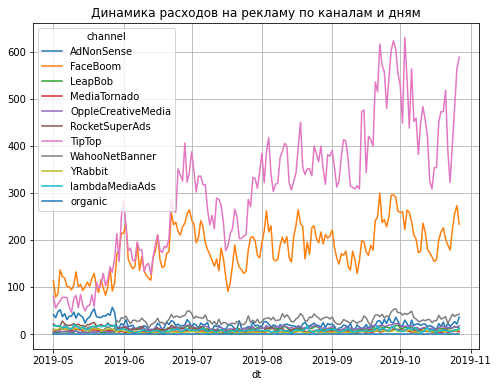

In [28]:
(profilles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum')
.plot(grid= True, figsize=(8,6), 
      title='Динамика расходов на рекламу по каналам и дням')
);

На графике также видно что наблюдается рост расходов на рекламу в двух источниках - TipTop и FaceBoom. Для прочих каналов расходы на рекламу не увеличивались и находятся пимерно на одном уровне. 

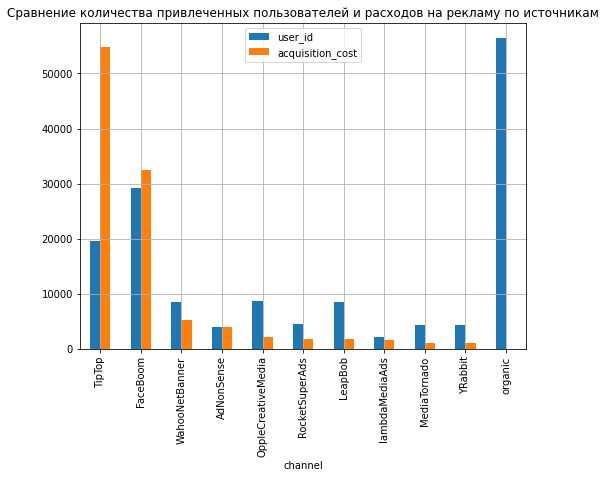

In [29]:
(profilles.groupby('channel').agg({'user_id':'count', 'acquisition_cost':'sum'})
 .sort_values('acquisition_cost', ascending = False)
 .plot(kind='bar', grid= True, figsize=(8,6), 
      title='Сравнение количества привлеченных пользователей и расходов на рекламу по источникам')
);

На графике видно что больше всего расходов на рекламу для источников TipTop и FaceBoom, для прочих источников затраты на рекламу значительно ниже. При этом больше всего пользователей приложения в анализируемый период времени органические, затраты на рекламу на из привлечение равны 0.  

Сгруппируем данные по времени и проанализируем изменение расходов на рекламу по месяцам.

In [30]:
profilles.groupby('month').agg({'user_id':'count', 'acquisition_cost':'sum'}) 

user_id  acquisition_cost
month                                
2019-05-01    27111          9978.570
2019-06-01    23123         15090.045
2019-07-01    22627         16447.060
2019-08-01    26586         20657.870
2019-09-01    26327         22441.340
2019-10-01    24234         20882.415

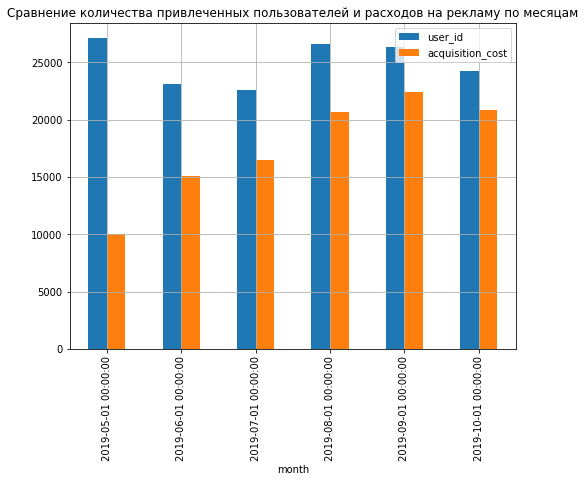

In [31]:
(profilles.groupby('month').agg({'user_id':'count', 'acquisition_cost':'sum'})
 #.sort_values('acquisition_cost', ascending = False)
 .plot(kind='bar', grid= True, figsize=(8,6), 
      title='Сравнение количества привлеченных пользователей и расходов на рекламу по месяцам')
);

На рафике наглядно видно, что расходы на рекламу в рассматриваемом периоде стабильно растут и лишь в октябре немного снижаются при этом все равно остаются выше расходов августа. Количество пользвателей при этом больше всего в мае, когда затраты на рекламу были минимальны. 

Также рассмотрим график изменения расходов на рекламу и количество привлеченных пользователей по дням.

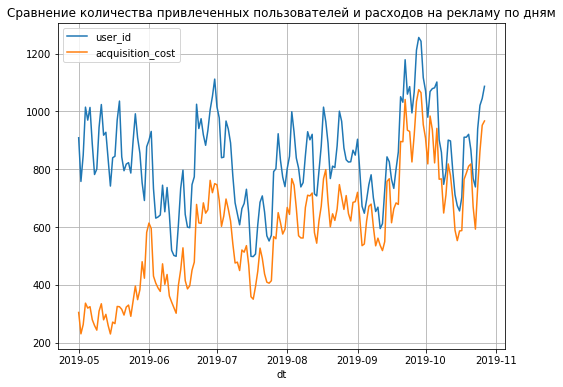

In [32]:
(profilles.groupby('dt').agg({'user_id':'count', 'acquisition_cost':'sum'})
 #.sort_values('acquisition_cost', ascending = False)
 .plot(grid= True, figsize=(8,6), 
      title='Сравнение количества привлеченных пользователей и расходов на рекламу по дням')
);

На данном графике также видно, что расходы на рекламу в рассматриваемом периоде растут, в то время как значительного роста количество пользователей не наблюдается. 

Рассчитаем среднюю стоимость привлечения одного пользователя из каждого источника.

In [33]:
profilles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values('acquisition_cost', ascending = False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Наибольшая средняя стоимость привлечения одного пользователя для источников TipTop и FaceBoom, затраты на рекламу в которых были наибольшими.

Общая средняя стоимость привлечения одного пользователя составляет

In [34]:
profilles[profilles['channel'] != 'organic']['acquisition_cost'].mean()

1.1274813239427588

## Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI проанализируем окупаемость рекламы.

Считаем, что смотрим данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [35]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 


Проанализируем общую окупаемость рекламы.

Так как при анализе данных в предыдыущем разделе было обнаружено, что больше всего пользователей приложения органические, то есть затрат на рекламу по их привлечению не было, то при анализе окупаемости рекламы исключим из анализа органических пользователей.

In [36]:
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] != 'organic'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=[],
                                                                          ignore_horizon=False)


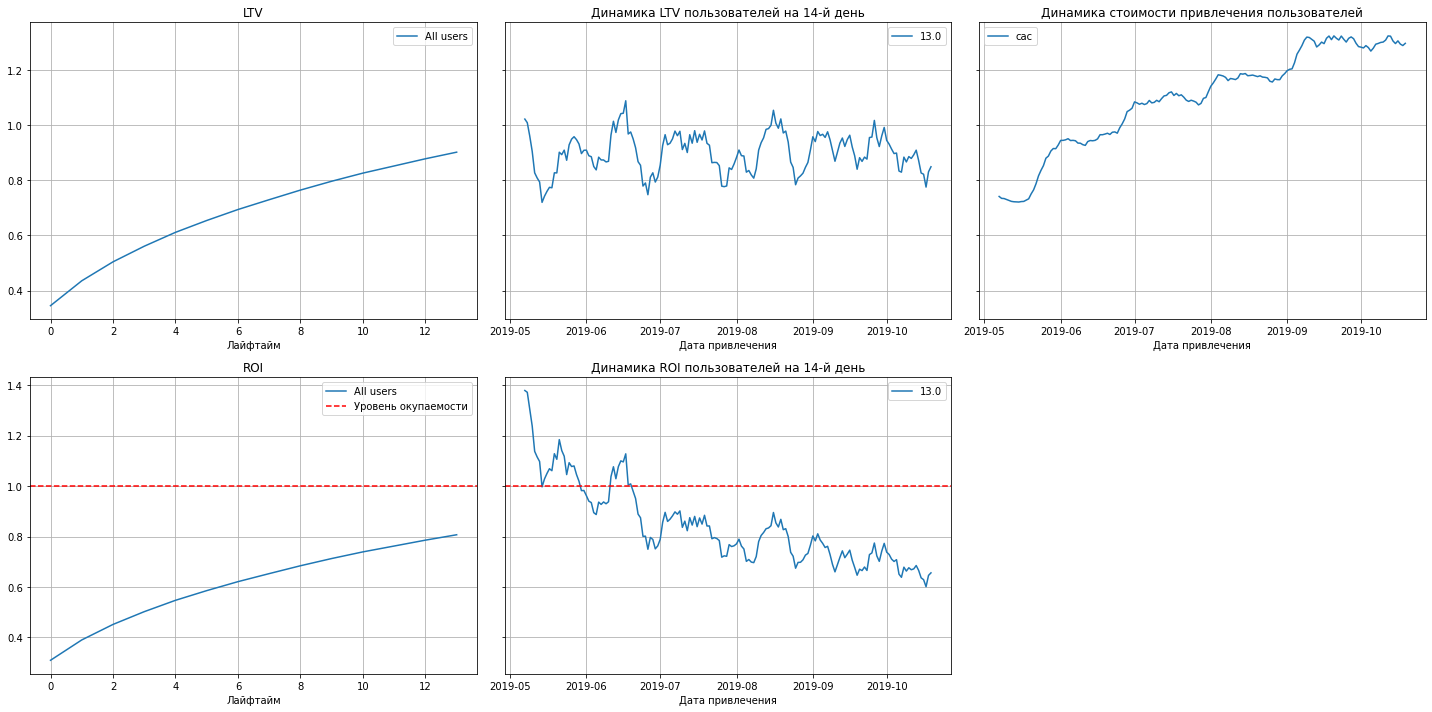

In [37]:
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI к концу второй недели чуть более 80%. А на графике динамики ROI видим что чем позже были привлечены пользователи, тем ниже ROI, и после середины июня ROI не превысил уровень окупаемости. 
- CAC растет, что свидетельствует об увеличении расходов на рекламу.
- На LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

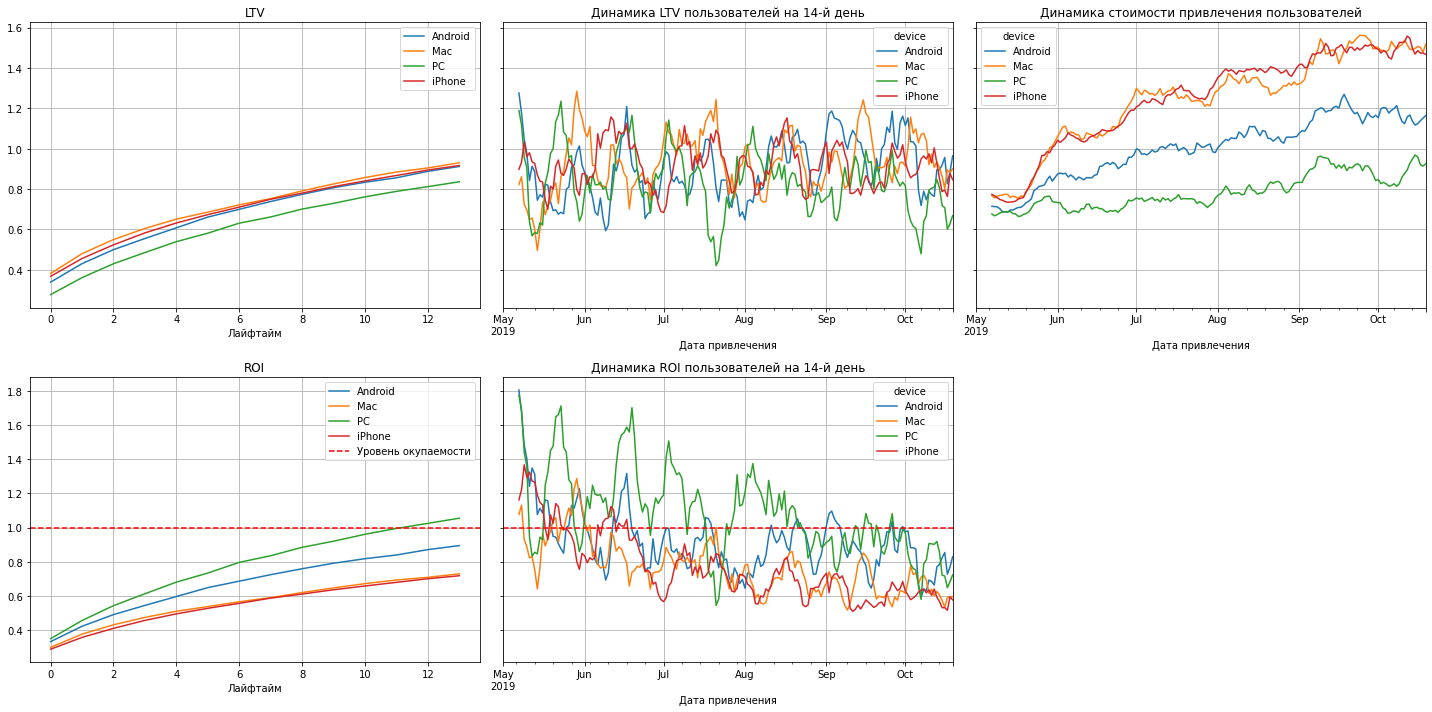

In [38]:
# смотрим окупаемость с разбивкой по устройствам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] != 'organic'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['device'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам видно:
- Реклама окупается только для пользователей PC, хуже всего окупаемость рекламы для пользователей iPhone и Mac.
- Стоимость привлечения пользователей PC напротив самая низкая, основной рост стоимости првлечения наблюдается для пользователей iPhone и Mac.
- LTV для пользователей PC значительно ниже, чем у остальных.

Можно предположить что какие то проблемы с пользователями с устройствами iPhone и Mac, так как при росте стоимости привлечения и стабильном LTV ROI для этих устройств самое низкое.

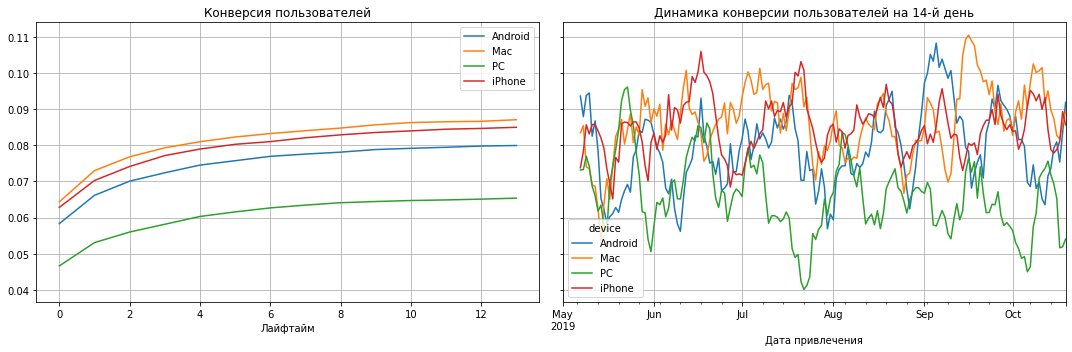

In [39]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profilles[profilles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конвертируются пользователи с устройствами iPhone и Mac хорошо. Наименьшая конверсия для пользователей PC. 

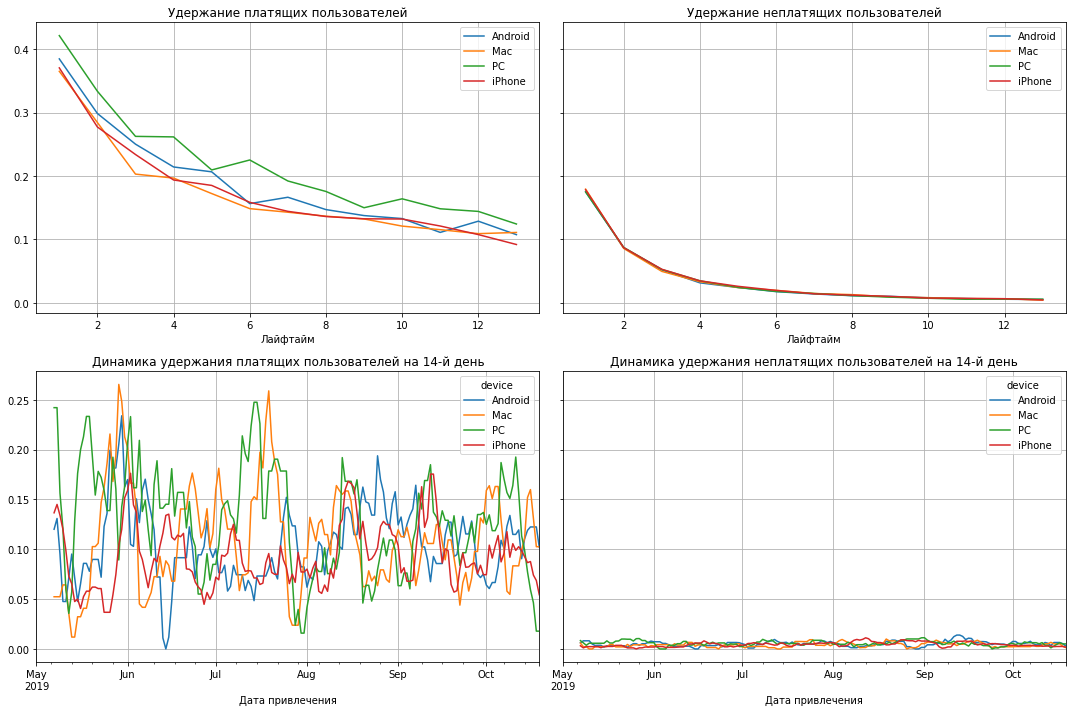

In [40]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profilles[profilles['channel'] != 'organic'], visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание для платящих пользователей с устройствами iPhone и Mac ниже, чем для пользователей с другими устройствами. В то время как удержание неплатящих пользователей практически неизменно в зависимости от устройства.

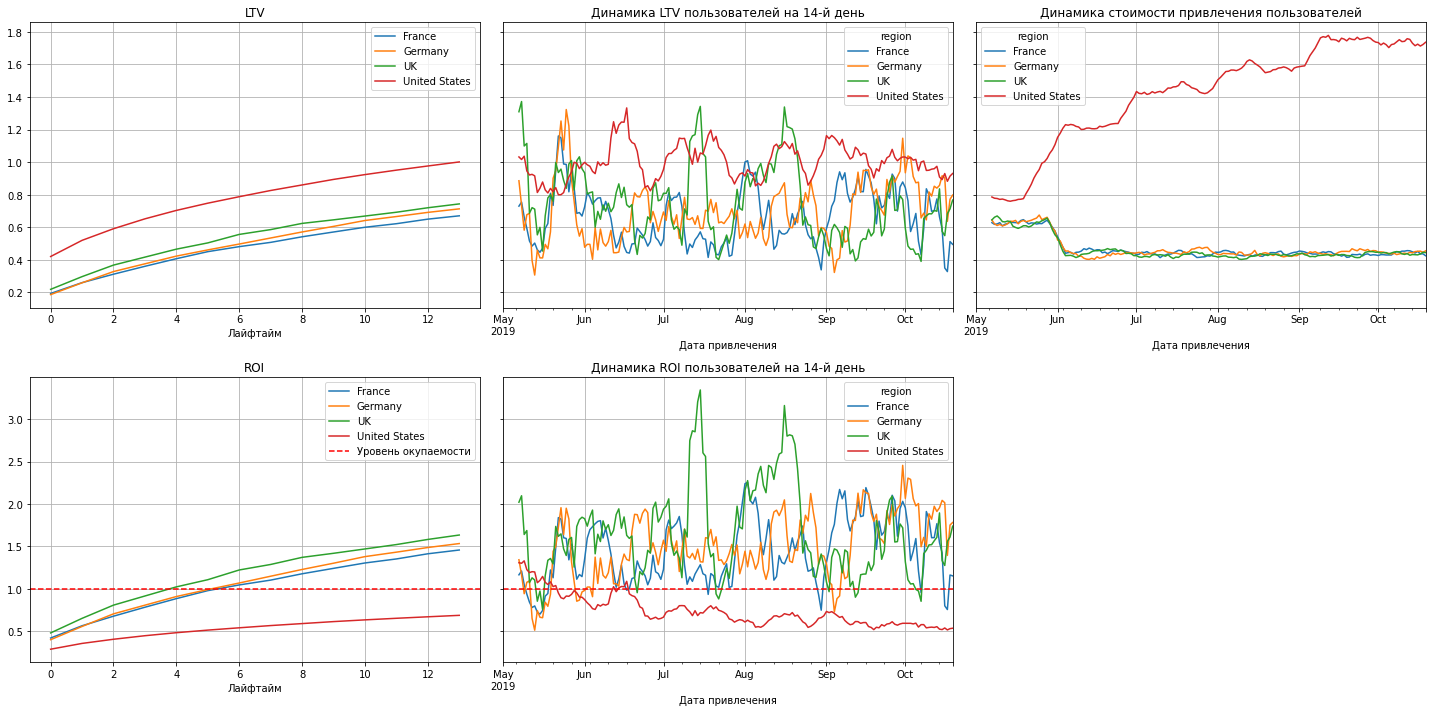

In [41]:
# смотрим окупаемость с разбивкой по странам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] != 'organic'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['region'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам видно:
- Реклама окупается во всех странах, кроме США.
- Стоимость привлечения пользователей в США напротив растет, а в остальных странах снизилась.
- LTV для пользователей из США значительно выше, чем у пользователей из остальных стран.

Явно наблюдаются какие то проблемы с пользователями из США, так как при значительном росте стоимости привлечения и высоком по сравнению с остальными странами LTV реклама в США не окупается.

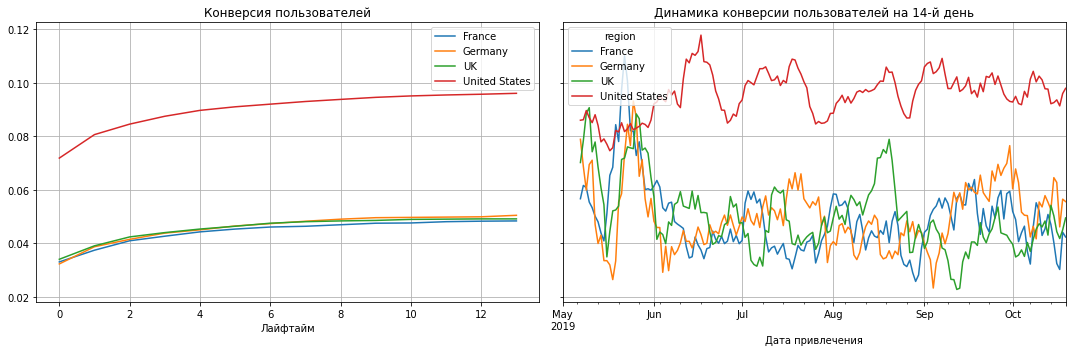

In [42]:
# смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profilles[profilles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

С конверсией пользователей в США проблем нет, конверсия значительно выше, чем у пользователей из других стран.

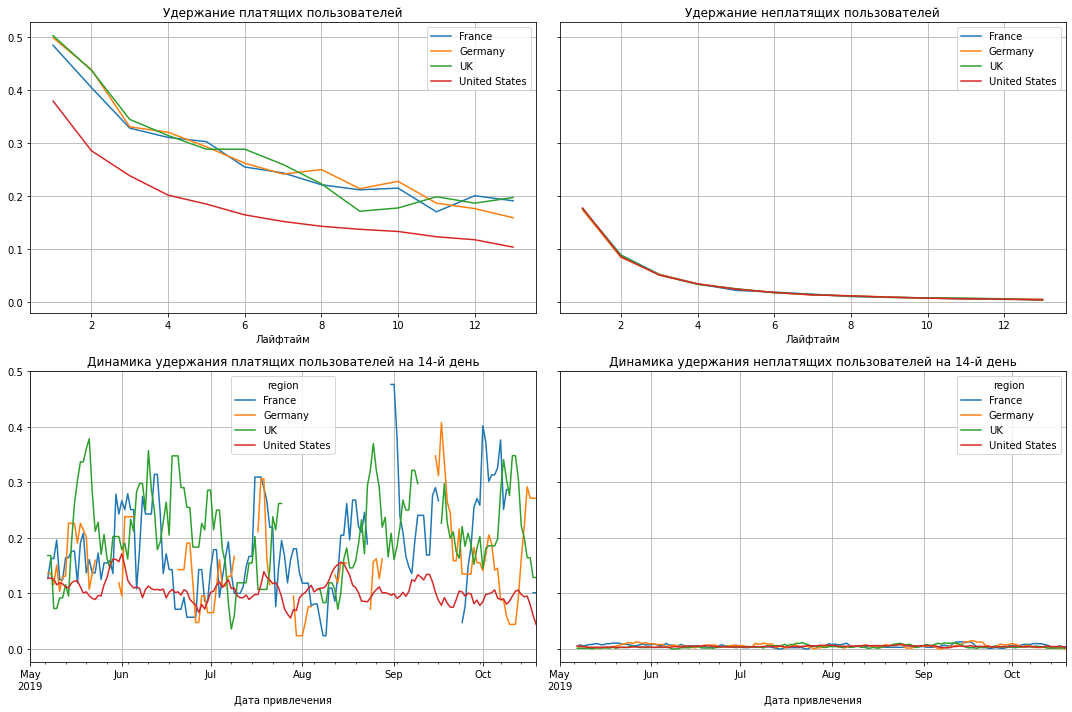

In [43]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profilles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот с удержанием платящих пользователей в США что-то не так. В остальных странах удержание платящих пользователей значительно выше, в то время как в удержании неплатящих пользователей разницы по странам нет.

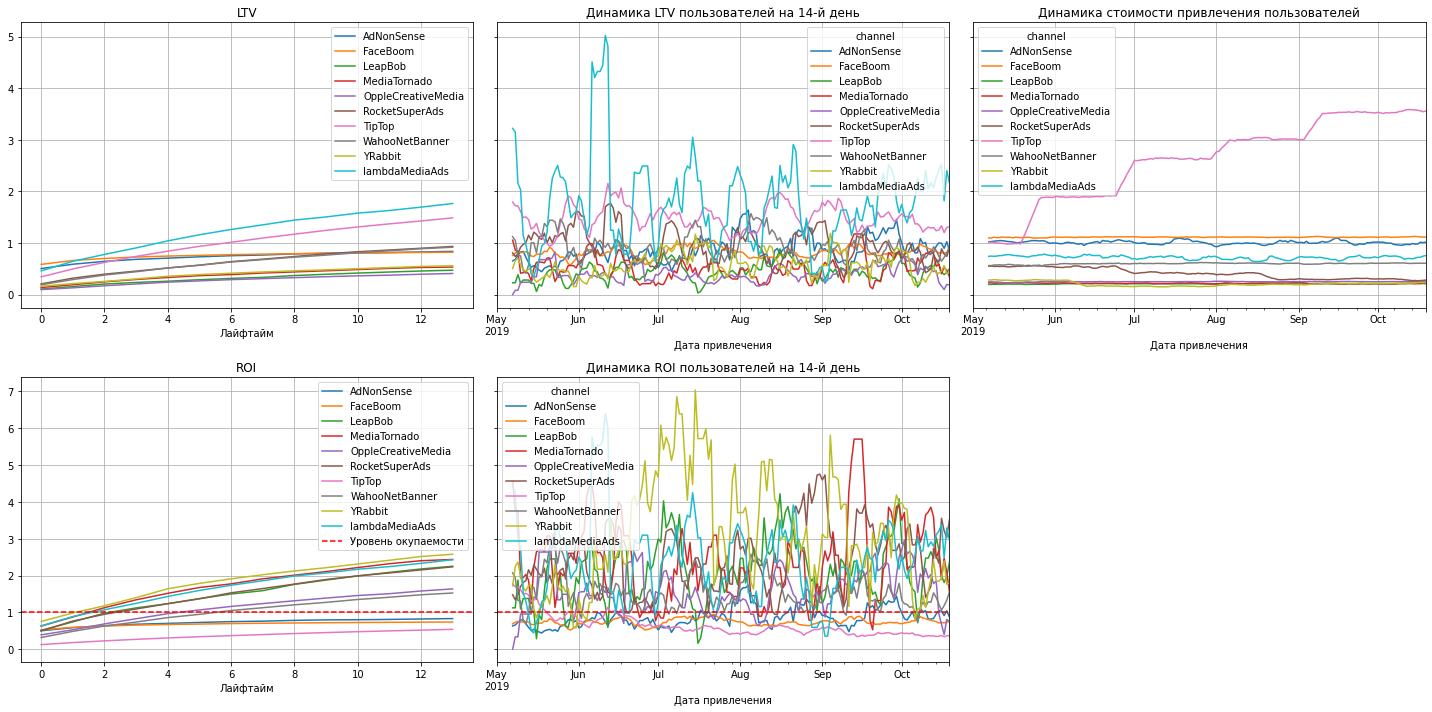

In [44]:
# смотрим окупаемость с разбивкой по каналам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] != 'organic'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['channel'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам видно:
- Реклама окупается не во всех каналах. Самый низкий ROI для канала TipTop, также не окупается рклама в каналах FaceBoom и AdNonSense.
- Стоимость привлечения пользователей  из канала TipTop напротив растет, а в остальных стабильна или снижается.
- LTV стабилен. Наибольший для канала lambdaMediaAds.

Расходы на рекламу в канале TipTop не оправдывают себя. Реклама в данном канале не окупаются и ROI для этого канала самый низкий.

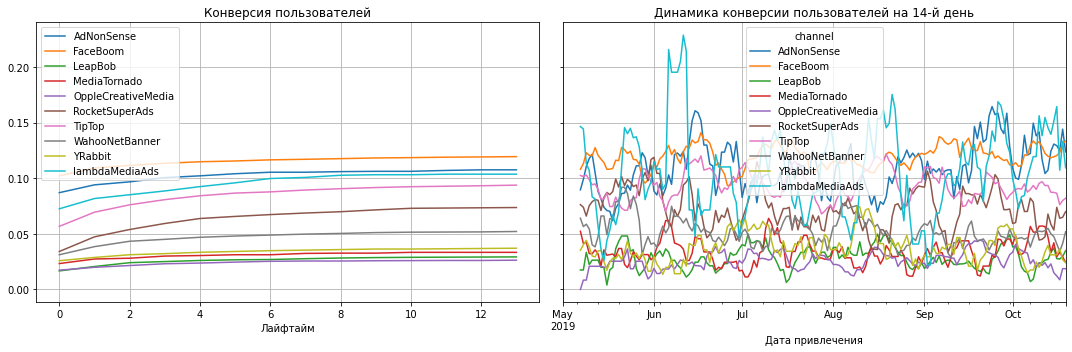

In [45]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profilles[profilles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конвертируются пользователи лучше всего из канала FaceBoom. Пользователи с канала TipTop также неплохо конвертируются.

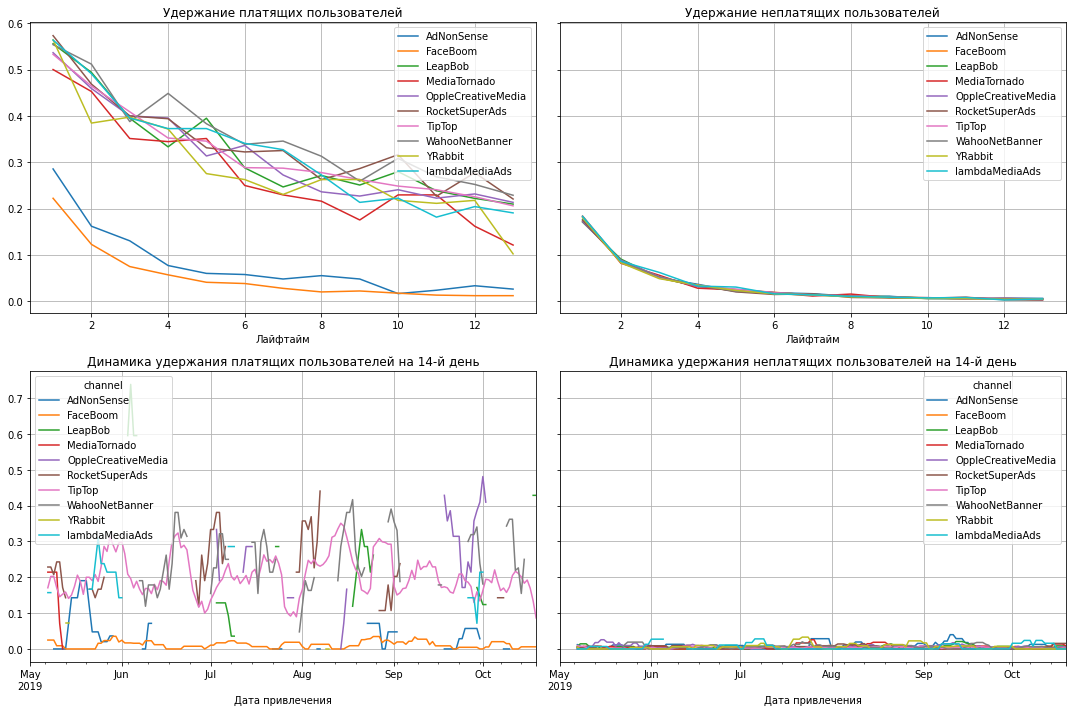

In [46]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profilles[profilles['channel'] != 'organic'], visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Разницы в удержании неплатящих пользователей в зависимости от канала нет. Платящие пользователи хуже всего удерживаются из каналов FaceBoom и AdNonSense.

При рассмотрении окупаемости по странам реклама не окупалась в США. Изучим более подробно окупаемость рекламы в США.

In [47]:
# сохраним профили пользователей США в data_usa
data_usa = profilles[(profilles['channel'] != 'organic') & (profilles['region'] == 'United States')]
data_usa.head()

user_id            first_ts       channel  device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
4  31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
8  58263264 2019-05-11 19:18:43      FaceBoom  iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
4  2019-10-02 2019-10-01  False          0.230769  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

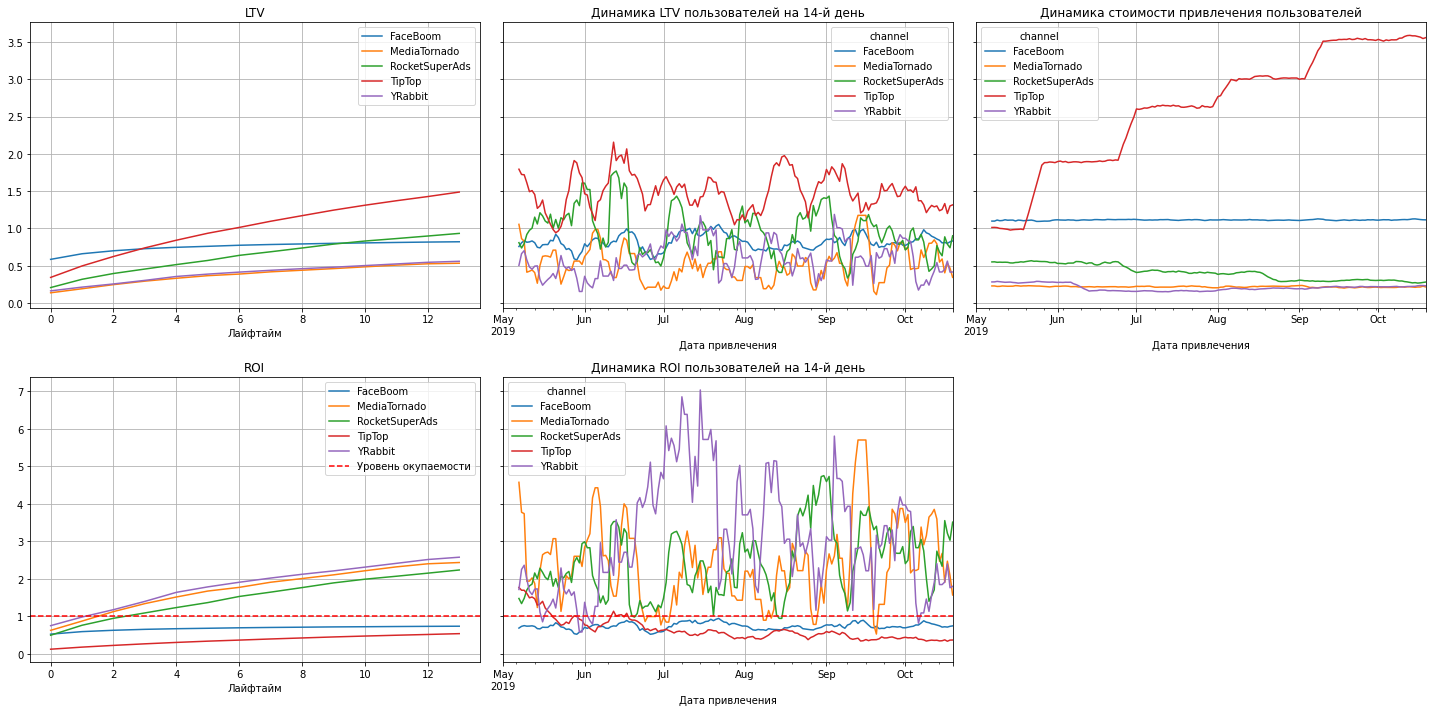

In [48]:
# смотрим окупаемость в США с разбивкой по каналам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( data_usa,
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['channel'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам видно, что реклама в США не окупается только в каналах FaceBoom и TipTop. Расходы на рекламу в канале FaceBoom в анализируемом периоде стабильны, а расходы в канале TipTop растут.

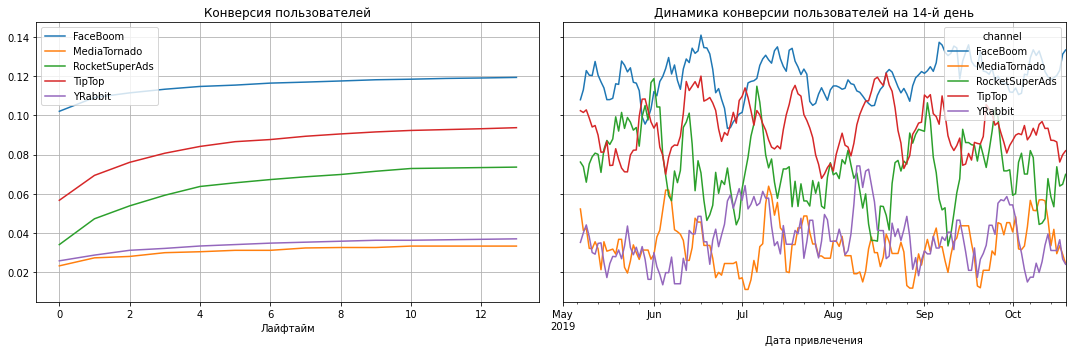

In [49]:
# смотрим конверсию в США с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    data_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лучше всего  конвертируются пользователи из канала FaceBoom.

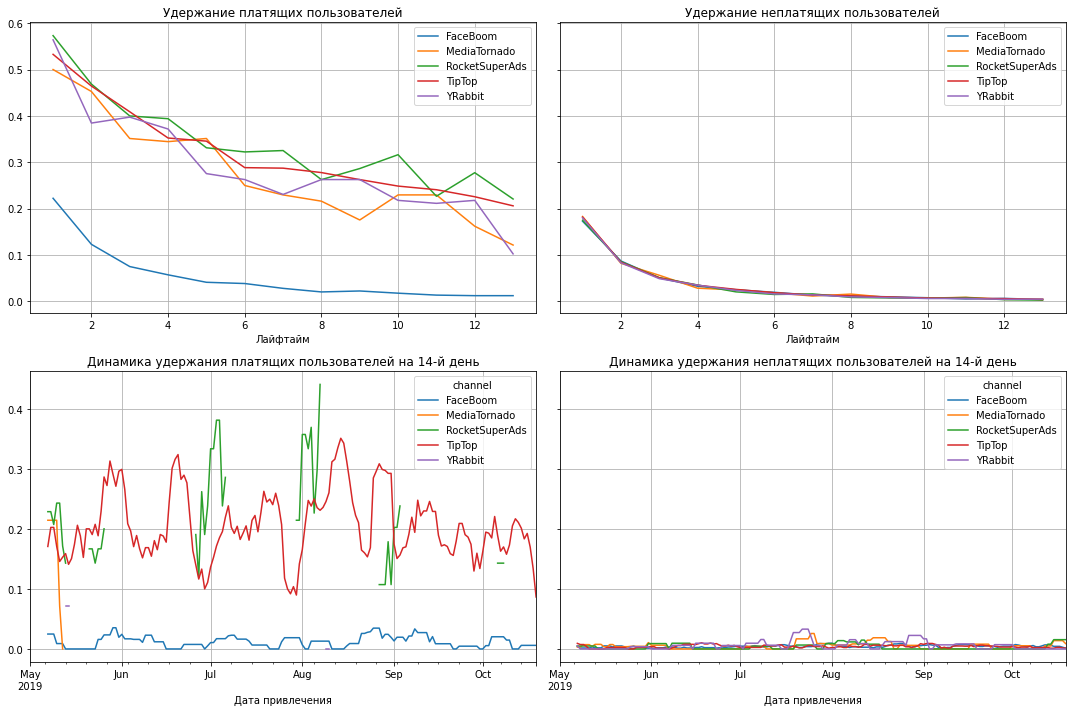

In [50]:
# смотрим удержание в США с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    data_usa, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам видно что с удержанием платящих пользователей из канала FaceBoom в США явно какие то проблемы. 

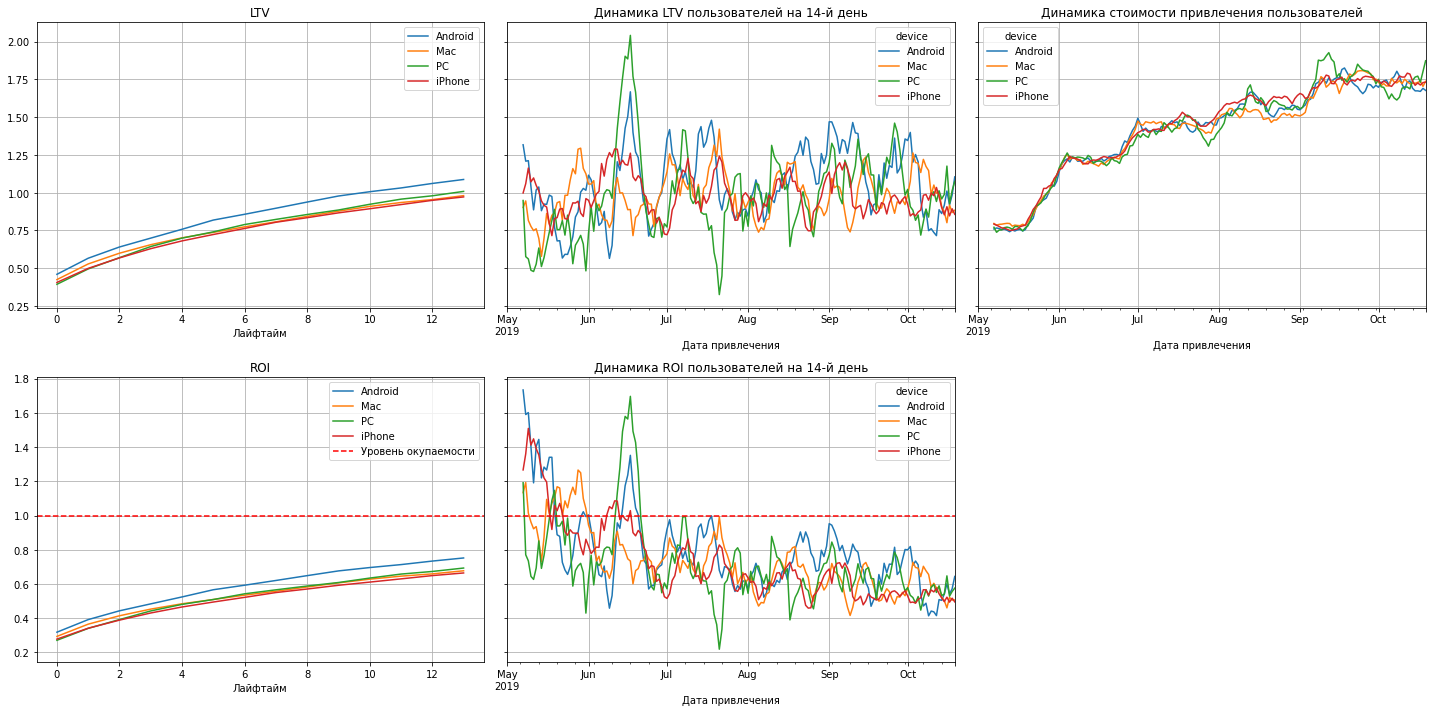

In [51]:
# смотрим окупаемость в США с разбивкой по устройствам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( data_usa,
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['device'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

По графикам видно, что независимо от устройств вся реклама в США не окупается.

Рассмотрим окупаемость рекламы в остальных странах кроме США (Франция, Великобритания, Германия) 

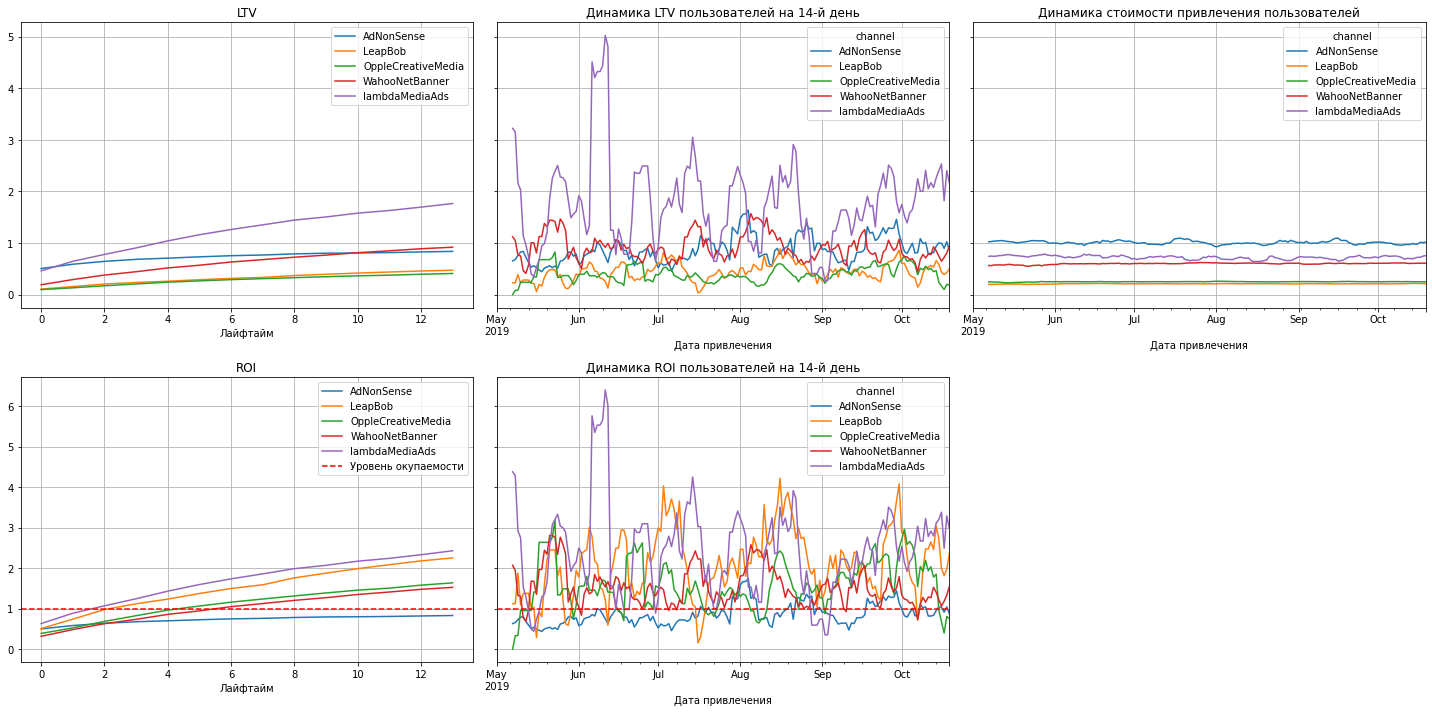

In [52]:
# смотрим окупаемость в Европе с разбивкой по каналам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( 
    profilles[(profilles['channel'] != 'organic') & (profilles['region'] != 'United States')],
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

В Европе наиболеее расходы в рекламу по каналам стабильны. Лучше всего окупаются вложения в рекламу на канале lambdaMediaAds. Не окупается канал AdNonSense.

При изучении окупаемости по каналам среди проблемных каналов также был AdNonSense. Изучим окупаемость по нему подробнее.

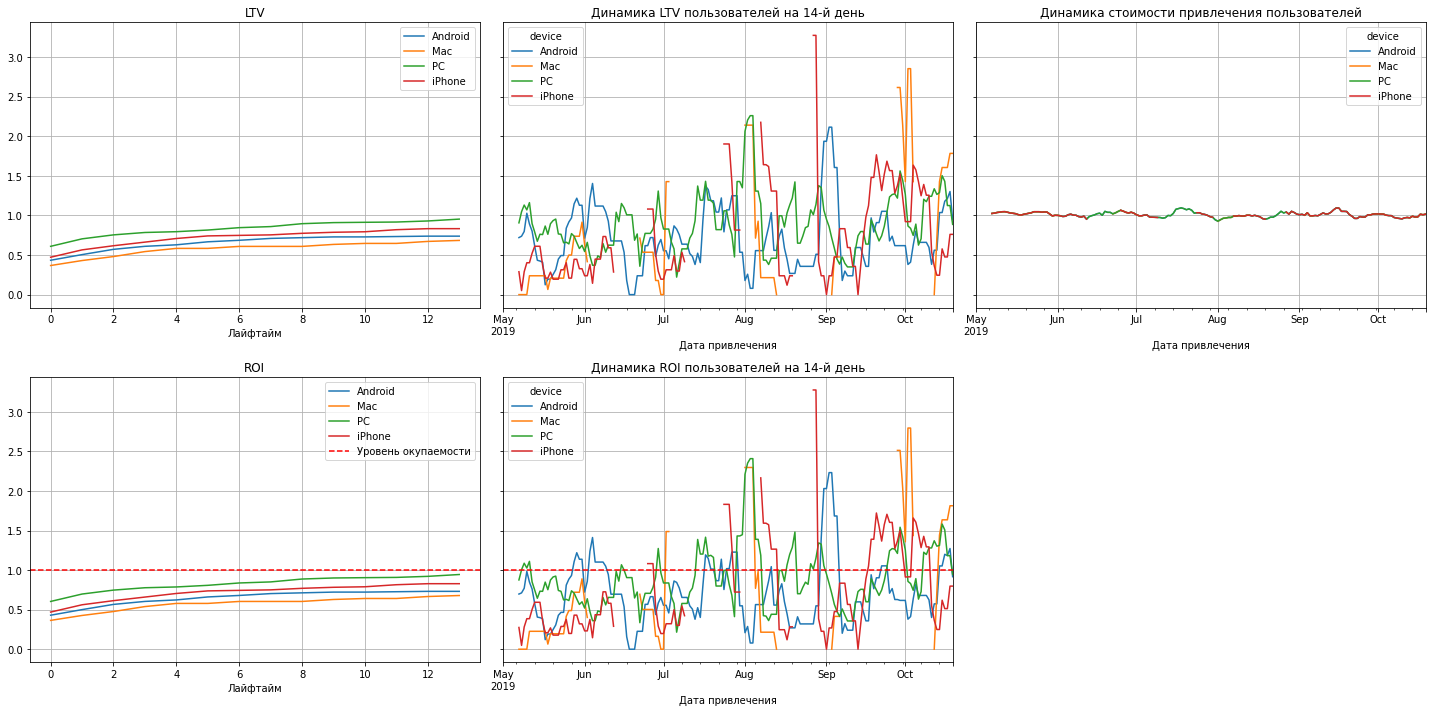

In [53]:
# смотрим окупаемость канала AdNonSense с разбивкой по устройствам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] == 'AdNonSense'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['device'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

Реклама в AdNonSense не окупается на всех устройствах.

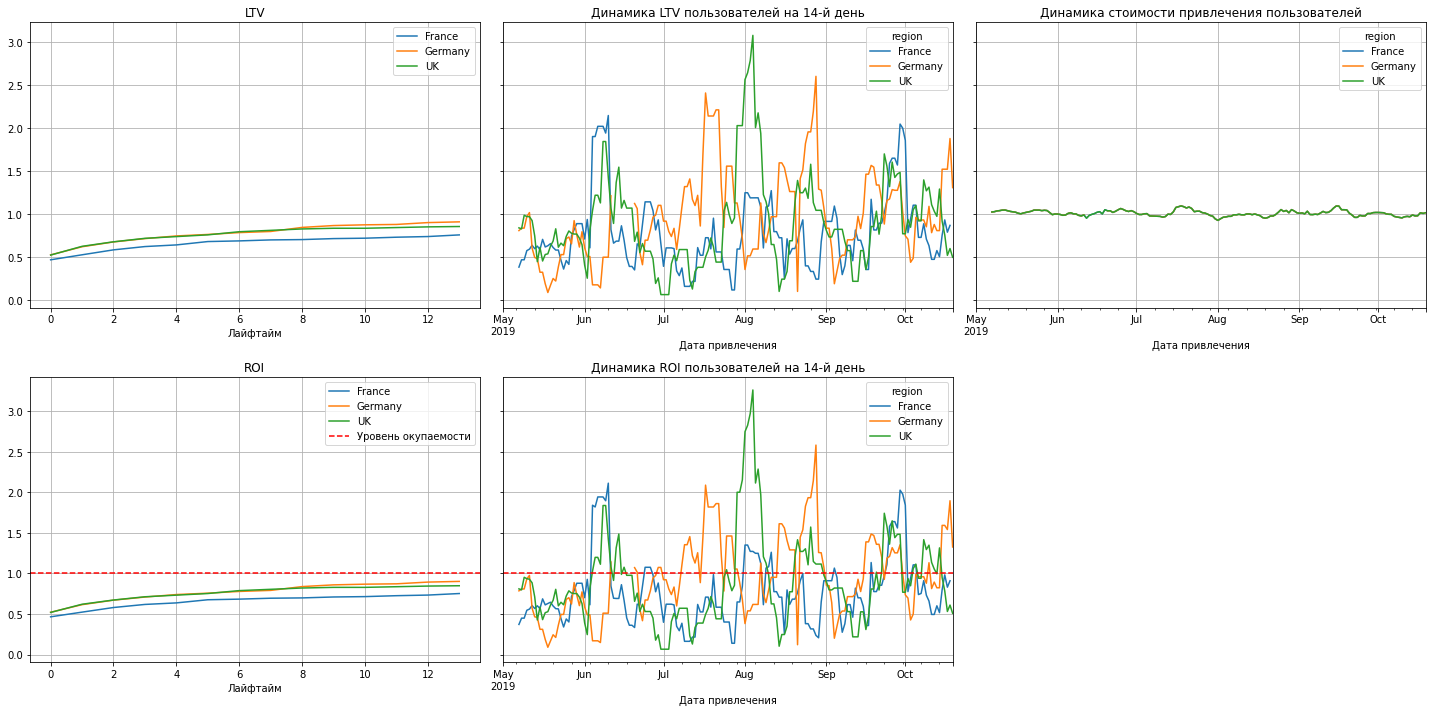

In [54]:
# смотрим окупаемость канала AdNonSense с разбивкой по странам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] == 'AdNonSense'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['region'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

Также реклама в AdNonSense не окупается на всех странах. Реклама по данному каналу осуществляется во Франции, Великобритании и Германии.

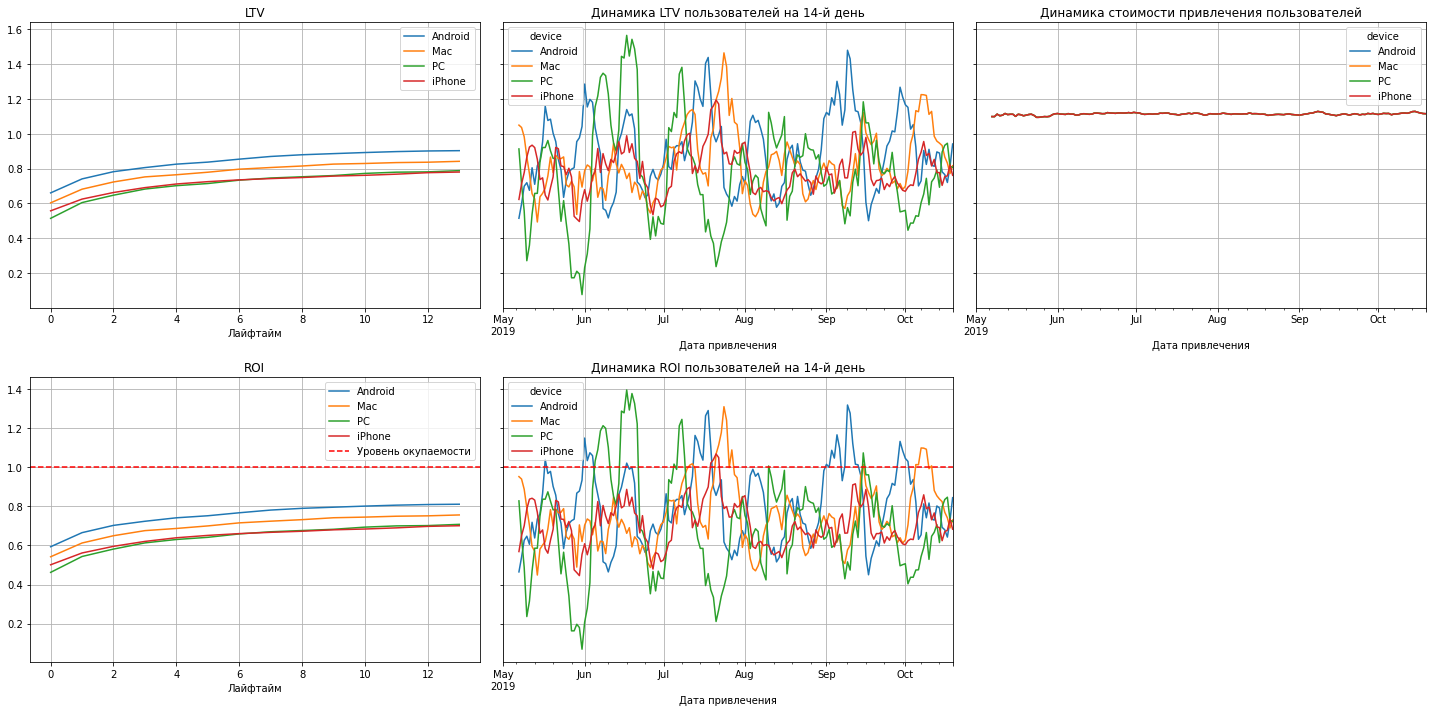

In [55]:
# смотрим окупаемость канала FaceBoom с разбивкой по устройствам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] == 'FaceBoom'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['device'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days) 

Разницы в окупаемости рекламы в канале FaceBoom в зависимости от устройства нет.

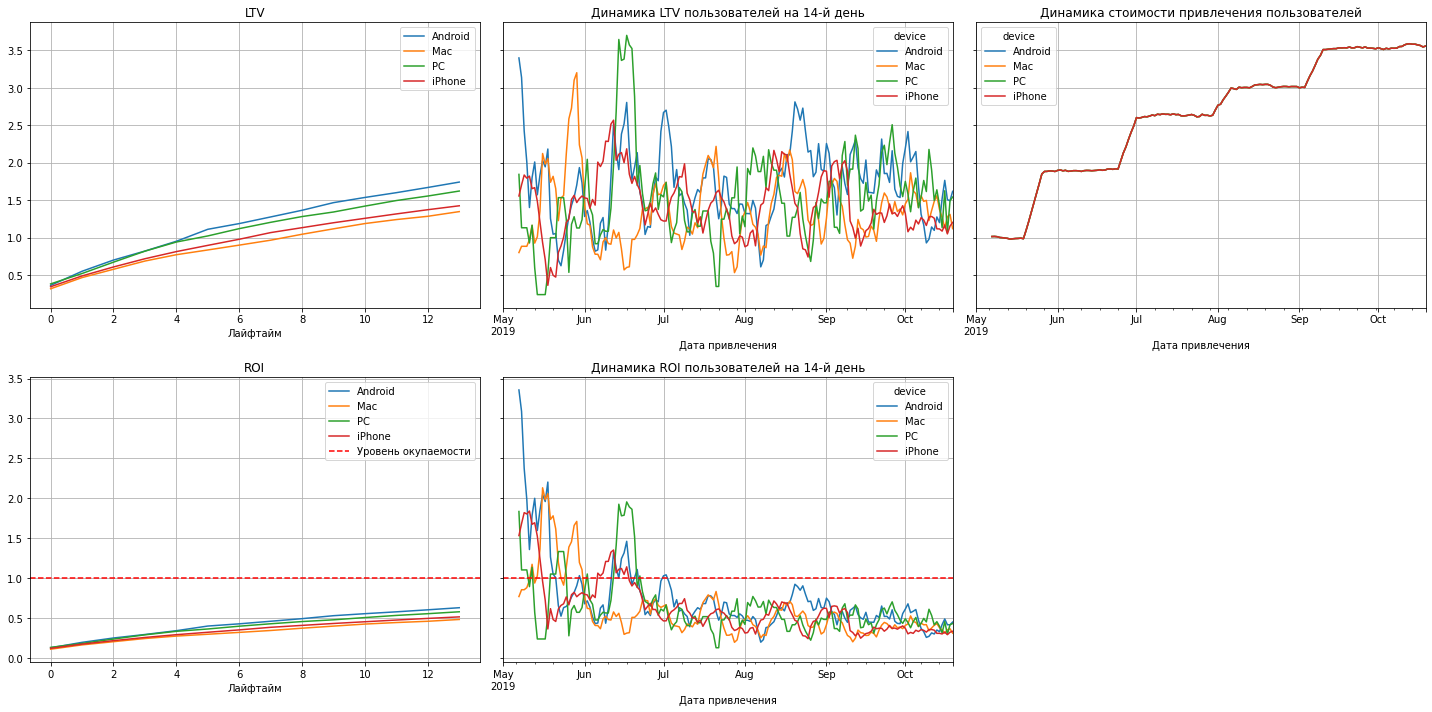

In [56]:
# смотрим окупаемость канала TipTop с разбивкой по устройствам
result_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv( profilles[profilles['channel'] == 'TipTop'],
                                                                          orders,
                                                                          observation_date,
                                                                          horizon_days,
                                                                          dimensions=['device'],
                                                                          ignore_horizon=False)
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days)

Разницы в окупаемости рекламы в канале TipTop в зависимости от устройства нет.

Общие расходы на рекламу не окупаются. Реклама окупается только для пользователей PC, хуже всего окупаемость рекламы для пользователей iPhone и Mac.  С пользователями из США наблюдаются какие то проблемы, так как при значительном росте стоимости привлечения и высоком по сравнению с остальными странами LTV реклама в США не окупается. Удержание платящих пользователей в США крайне низкое. В остальных странах удержание платящих пользователей значительно выше, в то время как в удержании неплатящих пользователей разницы по странам нет. Реклама не окупается для каналов TipTop, FaceBoom и AdNonSense. Стоимость привлечения пользователей из канала TipTop напротив растет, а в остальных стабильна или снижается. Платящие пользователи хуже всего удерживаются из каналов FaceBoom и AdNonSense.

## Общий вывод

Общие расходы на рекламу не окупаются. Не смотря на рост расходов на рекламу, окупаемость инвестиций снижается.  
Реклама окупается только для пользователей PC. Для пользователей с устройствами iPhone и Mac окупаемость самая низкая. Конвертируются пользователи с устройствами iPhone и Mac хорошо. Наименьшая конверсия для пользователей PC. Удержание для платящих пользователей с устройствами iPhone и Mac ниже, чем для пользователей с другими устройствами. В то время как удержание неплатящих пользователей практически неизменно в зависимости от устройства. 

Реклама окупается во всех странах, кроме США. Явно наблюдаются какие то проблемы с пользователями из США, так как при значительном росте стоимости привлечения и высоком по сравнению с остальными странами LTV реклама в США не окупается. С конверсией пользователей в США проблем нет, конверсия значительно выше, чем у пользователей из других стран. А вот с удержанием платящих пользователей в США проблемы. В удержании неплатящих пользователей разницы по странам нет.

При более подробном изучении окупаемости рекламы в США видим что реклама в США не окупается только в каналов FaceBoom и TipTop. Расходы на рекламу в канале FaceBoom в анализируемом периоде стабильны, а расходы в канале TipTop растут. Платящие пользователи из канала FaceBoom в США крайне плохо удерживаются. Независимо от устройств вся реклама в США не окупается.

Реклама по каналу AdNonSense осуществляется во Франции, Великобритании и Германии. Реклама в AdNonSense не окупается на всех устройствах и во всех странах.

Таким образом, в США необходимо обратить внимание на повышение удержания пользователей с канала FaceBoom. Рост расходов на рекламу в канале TipTop не окупается, возможно иммет смысл перераспределить расходы на другие каналы. Лучше всего в США окупаются вложения  в рекламу на канале YRabbit.  В Европе (Франция, Великобритания и Германия) расходы в рекламу по каналам стабильны. Во Франции, Великобритании и Германии не окупается реклама в канале AdNonSense, но лучше всего окупаются вложения в рекламу на канале lambdaMediaAds. Лучше всего окупается реклама в Великобритании. Окупаемость рекламы в том или ином канале от устройства пользователя не зависит.

